In [22]:
# いつもの
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import time
from matplotlib.font_manager import FontProperties

fp = FontProperties(fname=r'/system/library/fonts/ヒラギノ角ゴシック W0.ttc', size = 14)

%matplotlib inline

np.random.seed(20160704)
tf.set_random_seed(20160704)

In [23]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [32]:
# 畳みこみフィルターの設定
num_filters1 = 48

# プレースホルダーの設定
x = tf.placeholder(tf.float32,[None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, num_filters1],
                                         stddev = 0.1))
h_conv1 = tf.nn.conv2d(x_image, W_conv1,
                      strides = [1, 1, 1, 1], padding = 'SAME')
b_conv1 = tf.Variable(tf.constant(0.1, shape=[num_filters1]))
h_conv1_cutoff = tf.nn.relu(h_conv1 + b_conv1)
h_pool1 = tf.nn.max_pool(h_conv1_cutoff, ksize=[1, 2 , 2 , 1],
                         strides = [1, 2, 2, 1], padding = 'SAME')

In [33]:
num_filters2 = 96

W_conv2 = tf.Variable(tf.truncated_normal([5, 5, num_filters1, num_filters2],
                                           stddev = 0.1))
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2,
                       strides=[1, 1, 1, 1], padding='SAME')
b_conv2 = tf.Variable(tf.constant(0.1, shape=[num_filters2]))

h_conv2_cutoff = tf.nn.relu(h_conv2 + b_conv2)

h_pool2 = tf.nn.max_pool(h_conv2_cutoff, ksize=[1, 2, 2, 1],
                         strides= [1, 2, 2, 1], padding = 'SAME')

In [34]:
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*num_filters2])

num_units1 = 7*7*num_filters2
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.constant(0.1, shape=[num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool2_flat, w2) + b2)

keep_prob = tf.placeholder(tf.float32)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

w0 = tf.Variable(tf.zeros([num_units2, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden2_drop, w0) + b0)

In [35]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [36]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()

In [37]:
i = 0
p_val, loss_vals, acc_vals = [], [], []
t1 = time.time();
for _ in range (5000):
    i+=1
    batch_xs, batch_ts = mnist.train.next_batch(50) 
    sess.run(train_step,
             feed_dict={x:batch_xs, t: batch_ts, keep_prob:0.5})
    p_val.append(i)
    batch_t_xs, batch_t_ts = mnist.test.next_batch(50) 
    loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:batch_t_xs,t:batch_t_ts,keep_prob:1.0})
    loss_vals.append(loss_val)
    acc_vals.append(acc_val)
#     loss_val = np.sum(loss_vals)
#     acc_val = np.mean(acc_vals)
    if i % 500 == 0:
        print('Step: %d, Loss:%f, Accuracy: %f' 
                % (i, loss_val, acc_val))
    if i == 5000:
        t2 = time.time()
        estimate_time = t2 - t1
        print(estimate_time);
#         %timeit print ('finish');
        saver.save(sess, '/Users/yamamotomasaomi/Documents/GitHub/my_mechanic_studies/cnn_session_C', global_step=i)

Step: 500, Loss:1.878269, Accuracy: 0.980000
Step: 1000, Loss:0.802723, Accuracy: 1.000000
Step: 1500, Loss:0.390531, Accuracy: 1.000000
Step: 2000, Loss:0.219404, Accuracy: 1.000000
Step: 2500, Loss:0.440095, Accuracy: 1.000000
Step: 3000, Loss:0.061665, Accuracy: 1.000000
Step: 3500, Loss:2.531393, Accuracy: 0.980000
Step: 4000, Loss:0.008565, Accuracy: 1.000000
Step: 4500, Loss:1.890054, Accuracy: 0.980000
Step: 5000, Loss:0.181134, Accuracy: 1.000000
711.257926940918


In [9]:
# !ls cnn_session*

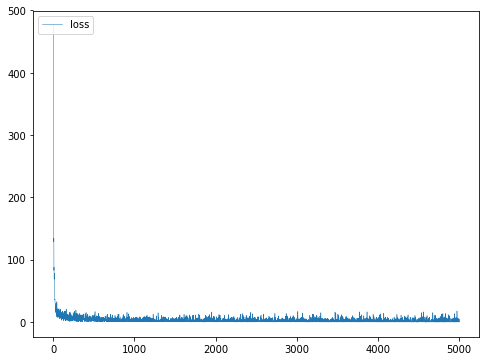

In [10]:
fig = plt.figure(figsize=(8,6))
subplot1 = fig.add_subplot(1,1,1)
subplot1.plot(p_val ,loss_vals,linewidth=0.5,label='loss')
subplot1.legend(loc='upper left')

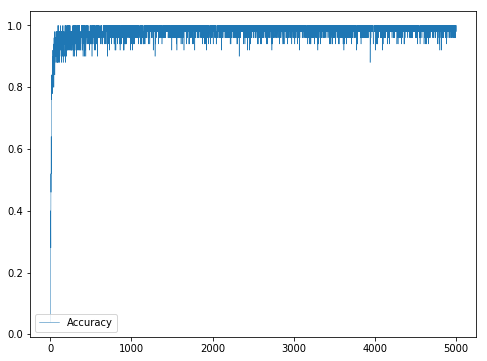

In [11]:
fig = plt.figure(figsize=(8,6))
subplot2 = fig.add_subplot(1,1,1)
subplot2.plot(p_val,acc_vals,linewidth=0.5,label='Accuracy')
subplot2.legend(loc='lower left')

# フィルター数の変更による影響
## 仮説１：学習によるセッション速度に影響
    ノード数や、重ね層が増加すると、精度の高い学習が可能となる。しかし、それにより学習に時間がかかる。すなわち、セッションをするのにも多くのフィルターを通さなければならず、学習時間はフィルターの数に比例するはずである。
## 仮説２：正答率の影響
    当然のことながら、フィルターの数が少なければ正答率が少なくなる可能性も高い。そのため、正答率自体にも影響が出るのではないかと考える。
    
### フィルターの数が半分
結果は以下のようになった。正答率は５００回ずつの際に表示させ、５０００回学習させるものとした。
また、最後が、計測にかかった時間である。
filter1 = 16, filter2 = 32
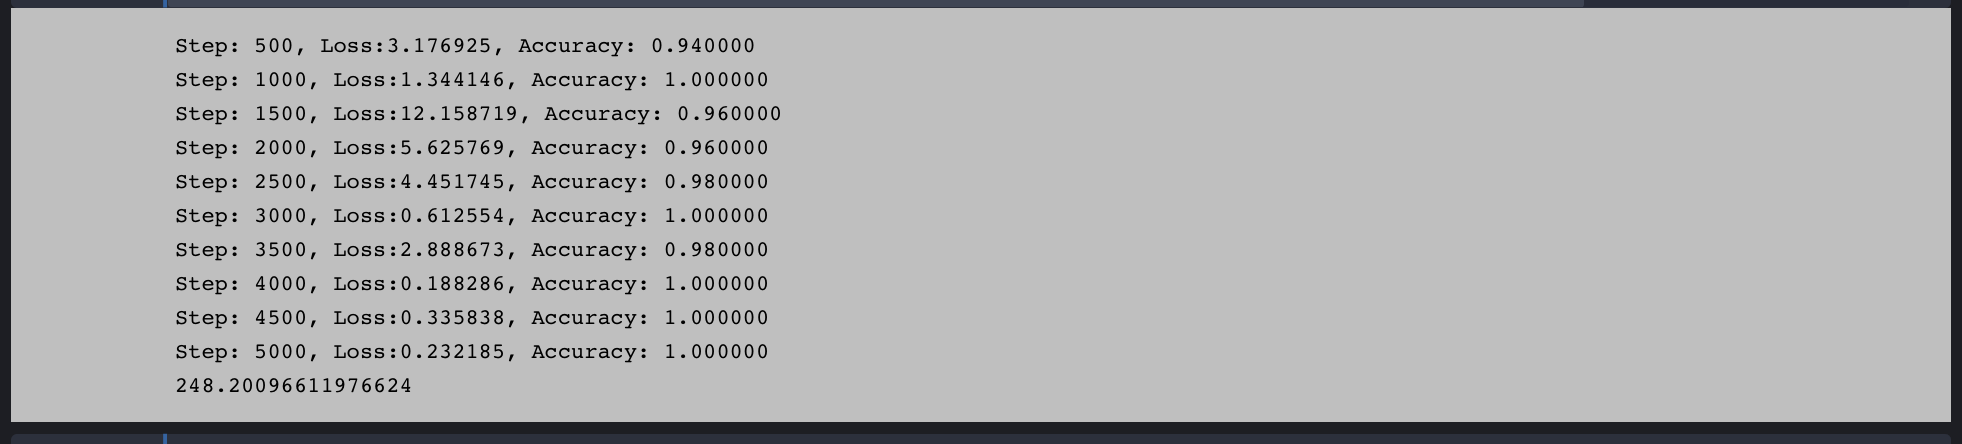
lossは以下のようになった。
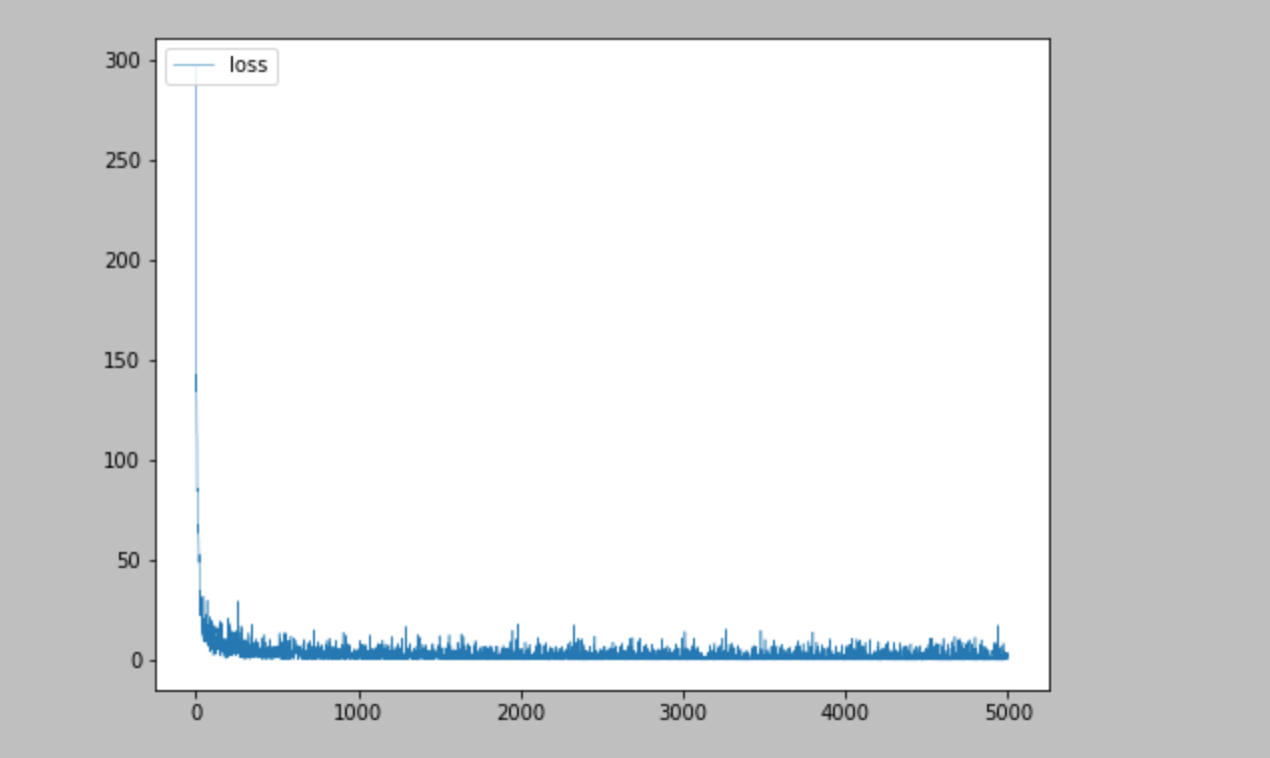
正答率は以下のようになった。
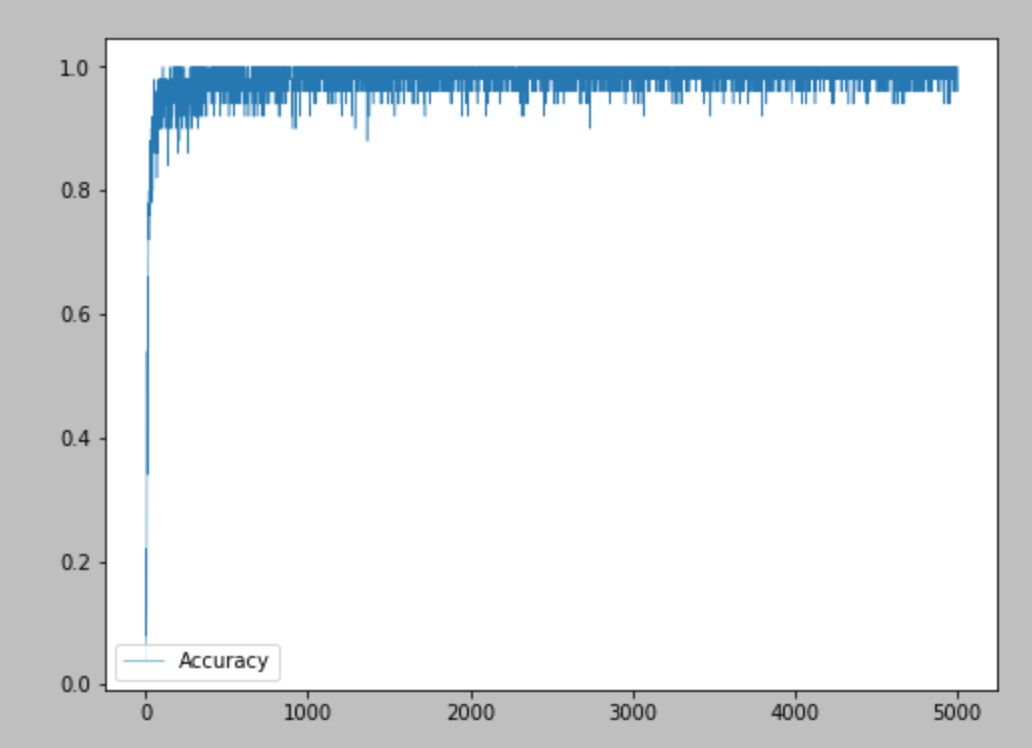

### フィルターの数を1/4にした。
次にフィルターの数を、1/4に変更してみた。これによって。実行時間は以下のようになり、やはり実行時間と、フィルターの数は比例すると考えられる。
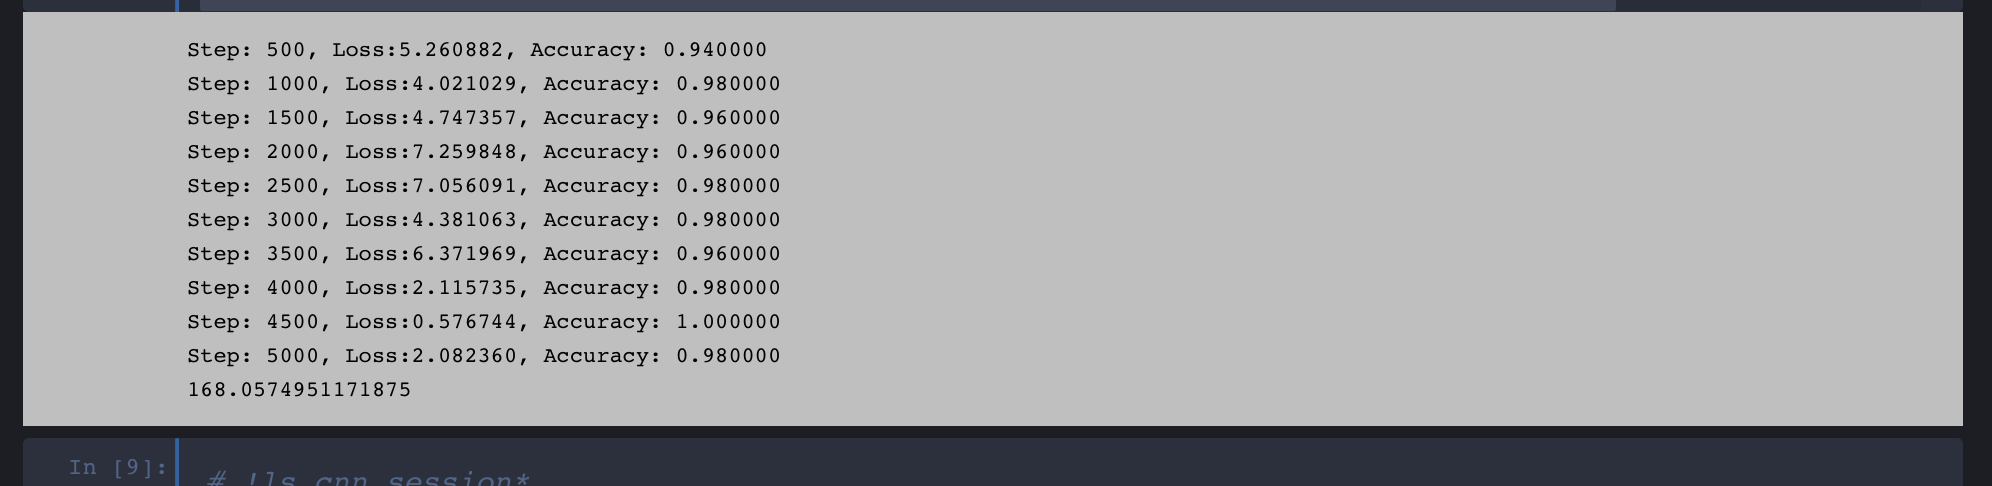
ただし、lossや、正答率には劇的な変化はなかった。
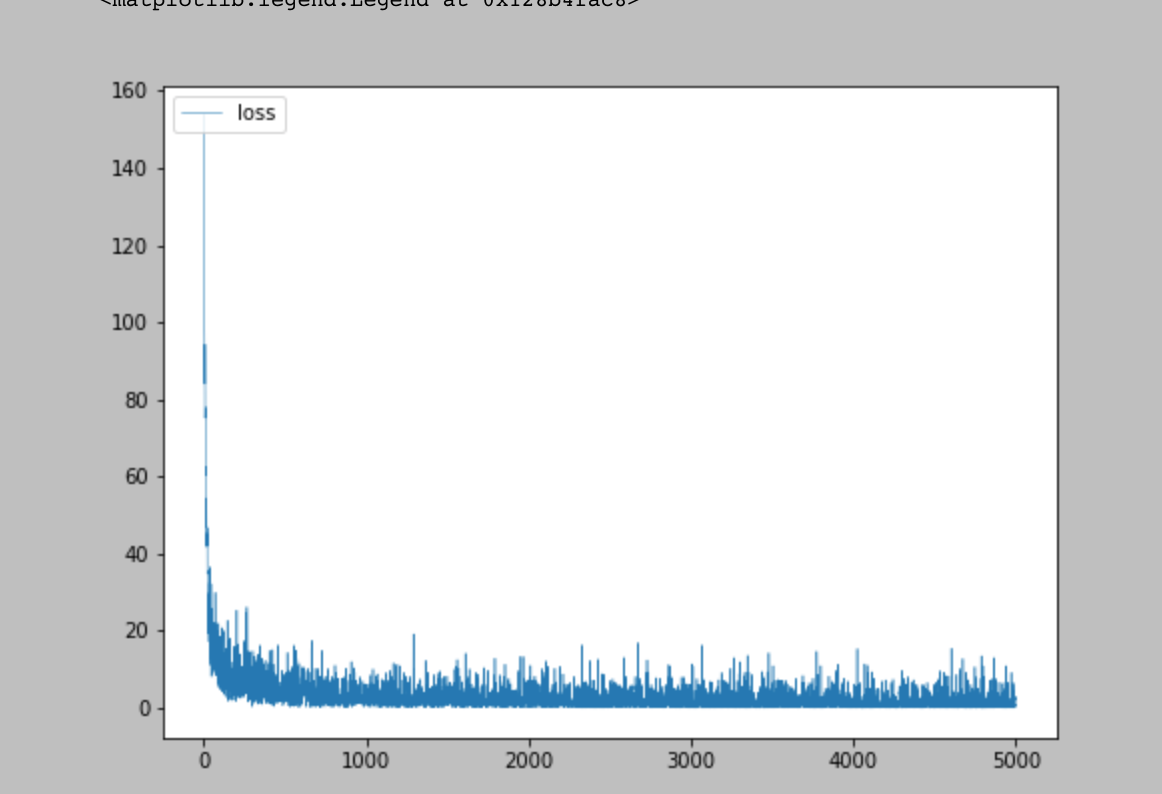
 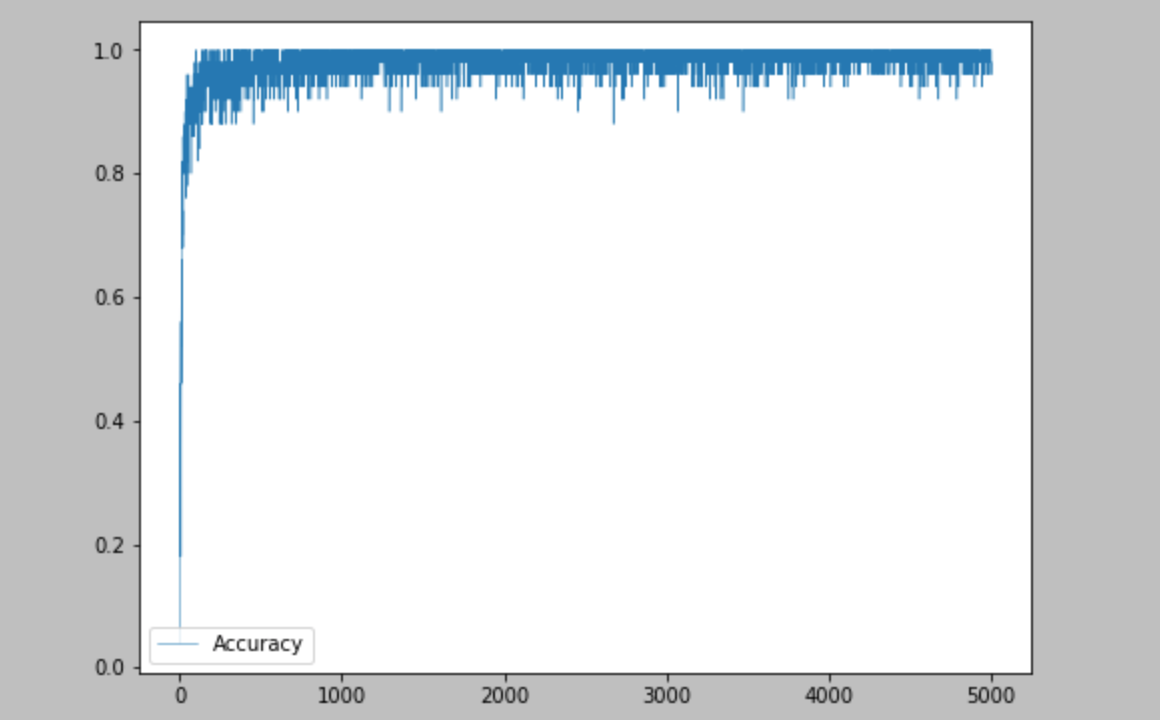
 
 ## フィルターの数を２倍にしてみた。
 やはり、フィルターの数によって、計算速度は変動することがわかる。
 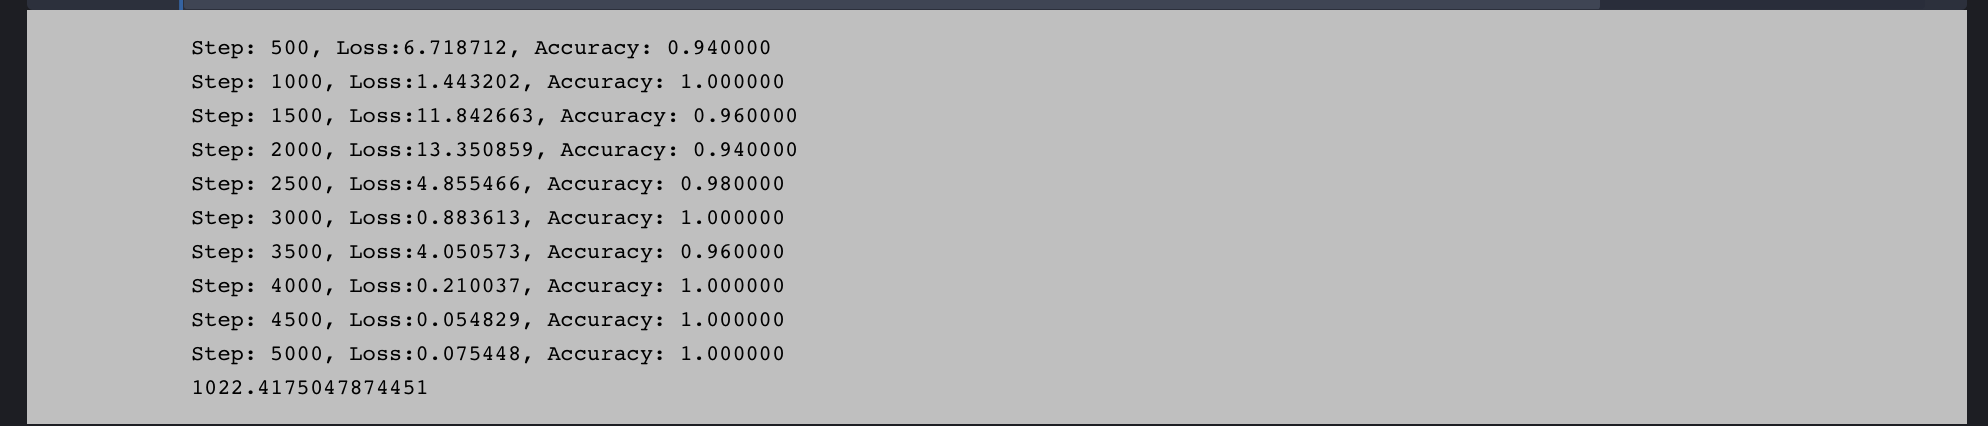
 
 lossグラフにも変化が見られる。
 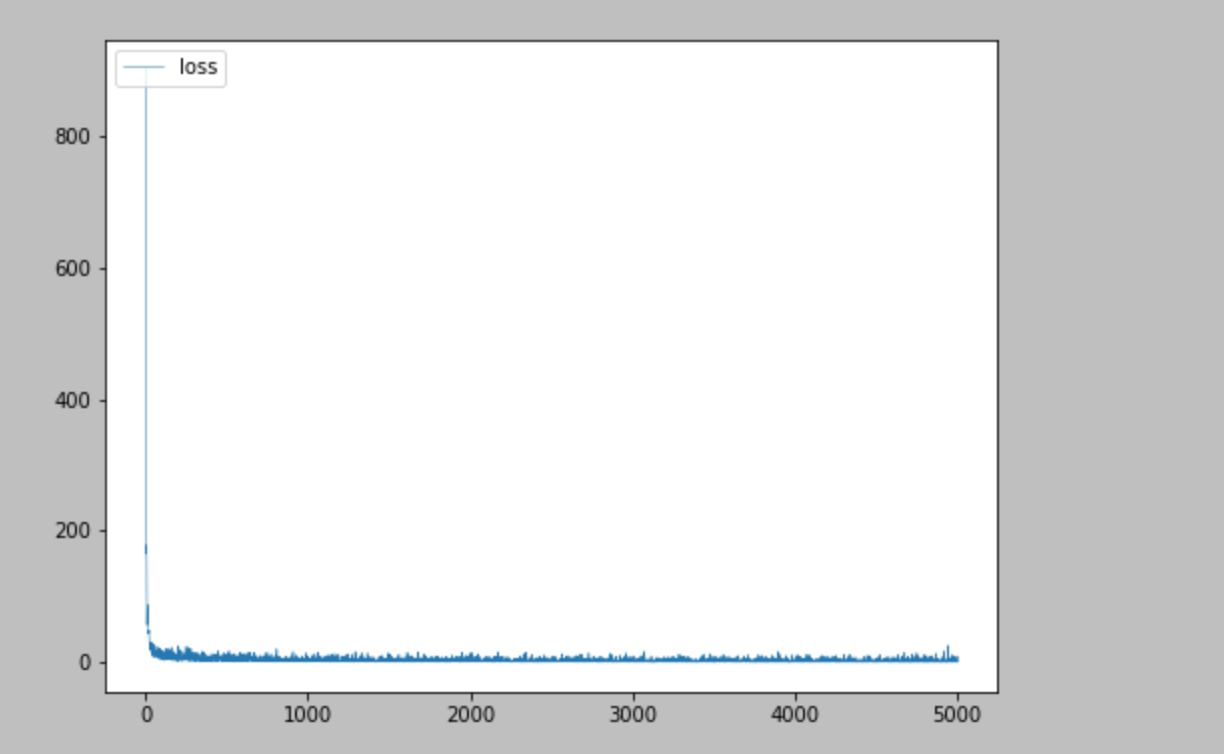
 

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'処理が完了するまでの経過時間[s]')

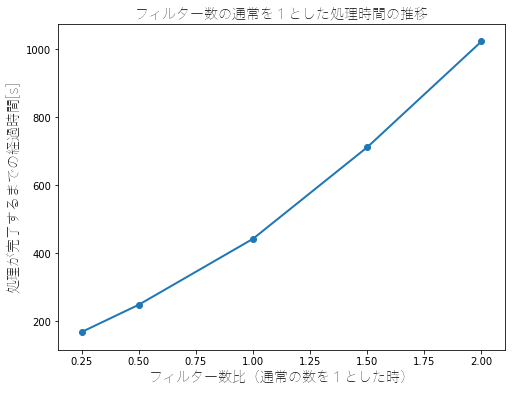

In [39]:
y_line = [168.0574,248.200,442.0305,711.2579,1022.417]
x_line = [1/4,1/2,1,3/2,2]
fig = plt.figure(figsize=(8,6))
plt.title('フィルター数の通常を１とした処理時間の推移',fontproperties=fp)
subplot = fig.add_subplot(1,1,1)
subplot.plot(x_line ,y_line,linewidth=2,label='loss')
subplot.scatter(x_line, y_line)
subplot.set_xlabel('フィルター数比（通常の数を１とした時）',fontproperties=fp)
subplot.set_ylabel('処理が完了するまでの経過時間[s]', fontproperties=fp)

計算時間はやはりフィルターの数に比例することがわかる。

## まとめ
仮説１は予想通り、フィルターの数の変更によって経過時間は線形に比例すると考えられる。また、仮説２では、正答率までの推移の傾斜度が変化していることがわかり、これは、フィルター数の増加による正答率の増加が、見込まれたためであると考えられる。これによって、試行回数を削減できる効果も期待できる。

## Lossについて
   今のプログラムでいえば、loss=-tf.reduce.sum
   t*(tf.log(p))=>あまりに小さいと欠損値（Nan）になってしまう。ちゃんとした値を返してくれない。結果としては信用できなくなる。いつもいつも起こる話ではない。そのまま計算して使っていると、Nanは信頼できなくなってしまう。
    tf.clip.by_value(p, 1.0e-10,1.0)使うと、2番目の値以下の値になったら、２番目の値を返すようになっている。
    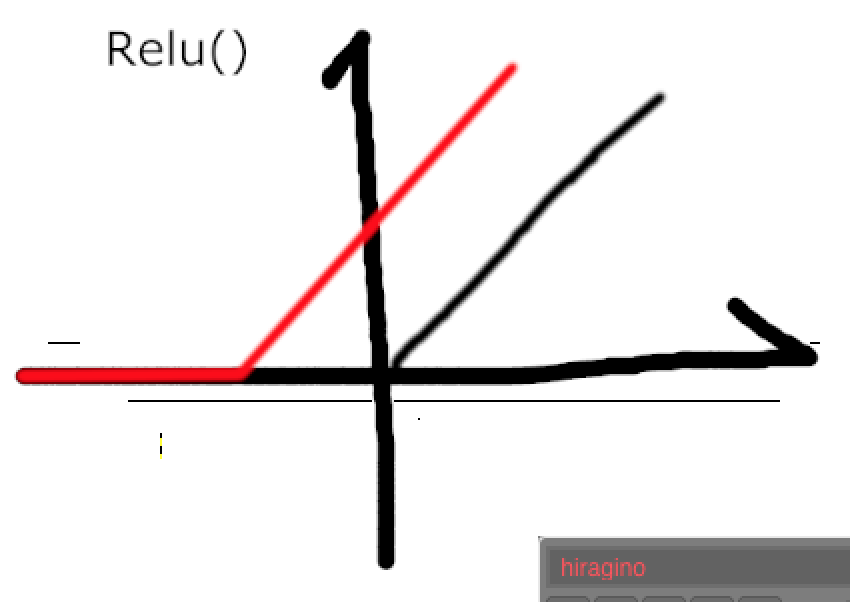
    
    フィルターの数が偶数であることからどこを中心と取るのかということが畳み込み層にうまく適合しないと考えられる。計算にズレが発生する。？